# Assignment 3: K-means

### Names of group members (max 2):
    Olga Siemieniuk 
    Benjamin Vigos

In [30]:
# importing the required modules
%pip install numpy matplotlib #installs them if they are not yet there
import numpy as np 
import matplotlib.pyplot as plt
import random
# to get matplot figures render correctly in the notebook use:
%matplotlib inline 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#installs': Expected package name at the start of dependency specifier
    #installs
    ^


## Part 1: Coding and testing the Kmeans algorithm

### Load and Inspect the Data

In [31]:
## the data set for testing

df = np.array([ [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
                [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24] ])
df.shape

(2, 19)

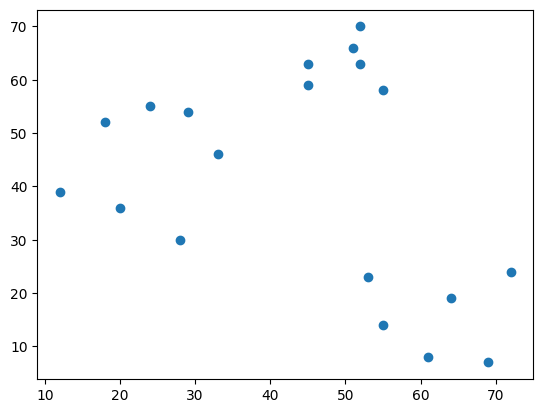

In [32]:
# Quick scatterplot for yourself, can you imagine what the cluster should be?

plt.scatter(df[0], df[1])



### Method 1. Using Kmeans form package sklearn.

<ul>
    <li> Make a plot function that gives the same colour to data points within one cluster. 
    </li>
    <li> Call KMeans from the package. (Consult the sklearn manual online and figure out how to do it.)
    </li>
    <li> Plot next to the data points also the centres of the clusters ($Z_j$)
    </li>
 </ul>

[[50.         62.33333333 23.42857143]
 [63.16666667 15.83333333 44.57142857]]


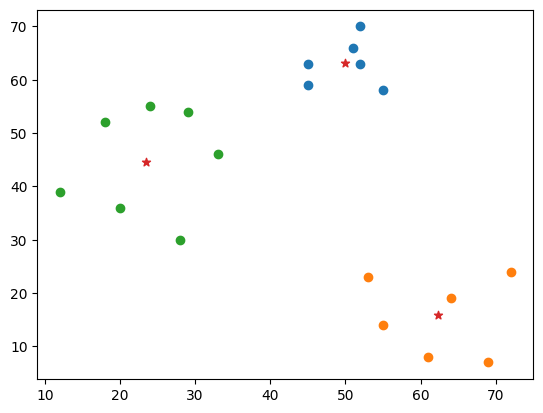

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

k = 3 ## the number of clusters

def plotclusters(data: np.ndarray, k):

    data = data.T
    kmeans = KMeans(k).fit(data)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    # give colors based on labels 

    clusters = []
    for cluster_number in range(0, k):
        clusters.append([])

    
    for index, point in enumerate(data):
        clusters[labels[index]].append(point)
    
    for cluster in clusters:
        new_cluster = np.array(cluster).T 
        plt.scatter(new_cluster[0], new_cluster[1])
    
    print(cluster_centers.T)
    plt.scatter(cluster_centers.T[0], cluster_centers.T[1], marker='*')
     
plotclusters(df, 3)
        


### Method 2. Code yourself: A heuristic, simple, fast, pretty good algorithm.

<ol>
    <li> Initialization. Choose k random points as centres; plot the data black, the three centers in colour
    </li>
    <li> Function: assigmnent. Compute for every data point the closest centre: assign the data point to that cluster.
    </li>
    <li> Function: replace. Put all centres as the average of the data in their cluster.
    </li>
    <li> Script. Repeat assignment, replace, plotclusters until nothing changes. 
    </li>
 </ol>

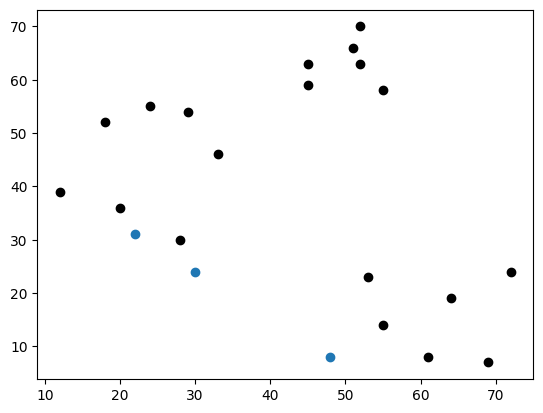

In [34]:
## Part 1. Initialization.

# randomly place the centroids on the graph, so they will random number between the smallest and biggest value of the data set
def initialize_centroids(data: np.ndarray, k):
    
    data_x = data[0]
    data_y = data[1]
    cluster_centers_x = []
    cluster_centers_y = []
    for _ in range(0, k):
        cluster_centers_x.append(random.randint(min(data_x), max(data_x)))
        cluster_centers_y.append(random.randint(min(data_y), max(data_y)))

    cluster_centers = np.array([cluster_centers_x, cluster_centers_y])
    plt.scatter(data_x, data_y, c='black')
    plt.scatter(cluster_centers[0], cluster_centers[1])


    return cluster_centers

    

cluster_centers = initialize_centroids(df, 3)





[[array([53, 23]), array([55, 14]), array([61,  8]), array([64, 19]), array([69,  7]), array([72, 24])], [array([55, 58])], [array([12, 39]), array([20, 36]), array([28, 30]), array([18, 52]), array([29, 54]), array([33, 46]), array([24, 55]), array([45, 59]), array([45, 63]), array([52, 70]), array([51, 66]), array([52, 63])]]


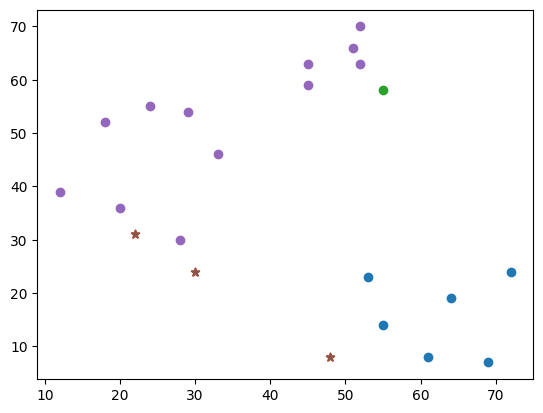

In [ ]:
## Part 2. Function: assigmnent.

def assignment(data: np.ndarray, cluster_centers: np.ndarray, k):

    point_labels = []
    cluster_points = []
    for _ in range(0, k):
        cluster_points.append([])

    for point in data.T:
        distance = []
        for index, cluster_centre in enumerate(cluster_centers.T):
            distance.append(np.linalg.norm(point - cluster_centre))
        point_labels.append(distance.index(min(distance)))
    
    for index, label in enumerate(point_labels):
        cluster_points[label].append(data.T[index])  # point_labels with label 0. Their index added to cluster_points[0]

    for label in range(0, k):
        plt.scatter(np.array(cluster_points[label]).T[0], np.array(cluster_points[label]).T[1])
        plt.scatter(cluster_centers[0], cluster_centers[1], marker='*')


    return cluster_points

cluster_points = assignment(df, cluster_centers, k)
print(cluster_points)




In [36]:
## Part 3. Function: replace.
# so now I want to compute the average of data for each cluster and put its centre there. The data for each cluster is in cluster points so I'd just take the average of that first
# then reasign the cluster centres. return the new locations of cluster centers

# x.mean(0) means we take the mean for each column, bc m[i,c] you're varying the 0 axis (rows) and constant columns 
def replace_centers(cluster_points):
    
    new_cluster_centers = []
    for cluster in cluster_points:
        cluster = np.column_stack(cluster)
        new_cluster_centers.append(cluster.mean(1))

    return np.array(new_cluster_centers)

new_cluster_centers =  replace_centers(cluster_points)
print(new_cluster_centers)





[[62.33333333 15.83333333]
 [55.         58.        ]
 [34.08333333 52.75      ]]


[[12 20 28 18 29 33 24 45 45 52 51 52 55 53 55 61 64 69 72]
 [39 36 30 52 54 46 55 59 63 70 66 63 58 23 14  8 19  7 24]] <class 'numpy.ndarray'> 3


IndexError: index 0 is out of bounds for axis 0 with size 0

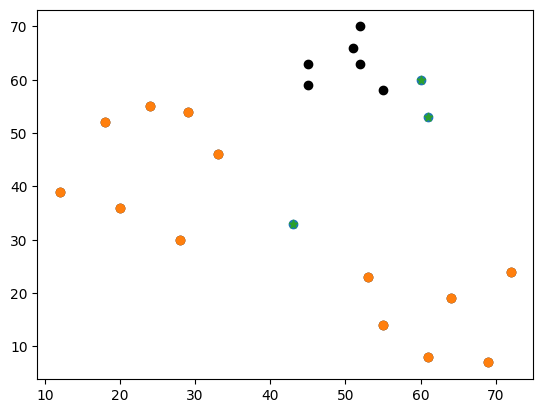

In [47]:
## Part 4. Script.

def compute_kmeans(data: np.ndarray, k):
    cluster_centers = initialize_centroids(data, k)
    print(data, type(cluster_centers), k)
    cluster_points = assignment(data, cluster_centers, k)
    cluster_centers = replace_centers(cluster_points)
    previous_centers = None

    while previous_centers is not None and (cluster_centers != previous_centers.all()):
        previous_centers = cluster_centers
        cluster_points = assignment(data, cluster_centers, k)
        cluster_centers = replace_centers(cluster_points)

    return cluster_points, cluster_centers

print(compute_kmeans(df, 3))
        
        

# Part 2: Apply Kmeans to Wines database
    
### Let's start by thanking the creators of the dataset that we will be using:

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

## Loading and Inspecting the Data

In [ ]:
# importing the required modules
%pip install numpy matplotlib seaborn pandas scikit-learn #installs them if they are not yet there
import numpy as np 
import matplotlib.pyplot as plt
# to get matplot figures render correctly in the notebook use:
%matplotlib inline 
import pandas as pd
import seaborn as sns

rwine = pd.read_csv('winequality-red.csv', sep=';')  # Makes Pandas objects
wwine = pd.read_csv('winequality-white.csv', sep=';') 

In [ ]:
# You may analyse the dataset of the wine of your choosing (red or white):
wines = 'your wine here'.sample(frac = 1)

# We just drop the 'quality' from the dataset:
wines_noquality=wines.drop('quality', axis=1)
# the number of samples M in the total combined set is still the same
M = len(wines_noquality)
# the number of features N (excluding the bias) are now all (excluding f='quality'):
N =  wines_noquality.shape[1]
wines_noquality.head() # We will use everything you see here.
X=np.zeros((M,N))
X[0:M,0:N]=wines_noquality[:][0:M]


### Prepare the data and reduce the dimensionelity of the feature space

<ol>
    <li>Feature scaling of all features in the database</li>
    <li>Do a Principle Component Analysis (PCA)</li>
    <li>Reduce the dimensionality of the feature space to 2 by projecting your samples along the first 2 principle component vector</li>
    <li>Plot your samples as a scatter plot in 2d</li>
    </ol>

In [ ]:
# Step 1: feature scaling
...

In [ ]:
# Step 2: PCA analyis
from sklearn.decomposition import PCA
...

In [ ]:
# Step 3: Project samples along PCA directions
...

In [ ]:
# Step 4: Scatterplot of sample in 2d plane spanned by the first 2 PCA vectors
...

### Kmeans cluster analysis in the plane spanned by the first 2 PCA vectors

<ol>
    <li>Do Kmeans clustering with either method 1 or method 2</li>
    <li>As a function of the number of centroids, plot the average distance of each sample to its centroid </li>
    <li>Determine a sensible number of clusters and explain why. You could try the 'elbow method'. What is the problem with not knowing the number of clusters? </li>
    <li>Plot the clusters in a scatterpot with different colors</li>
</ol>

In [ ]:
# Step 1:  Kmeans clustering 
...

In [ ]:
# Step 2:  Average distance to the k centroids
...

In [ ]:
# Step 3: Determine optimal k value
...